In [3]:
pip install pynrrd

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import glob
from matplotlib import pyplot as plt
import nrrd

In [46]:
# https://pypi.org/project/pynrrd/
image_name = 'patient_1/CT.nrrd'
readdata, header = nrrd.read(image_name)
# print(readdata.shape) ## (512, 512, 1101)
# print(header)

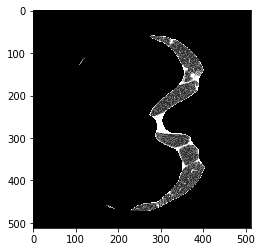

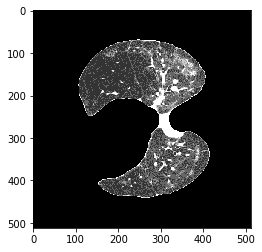

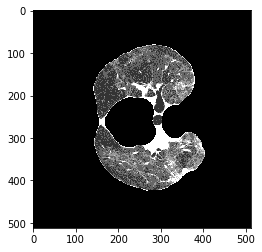

In [55]:
for i in range(3):
    index = i * 200 + 300
    plt.imshow(readdata[:,:,index], cmap = 'gray')
    plt.show()

In [38]:
image_name_followup = 'patient_1/CT_followup.nrrd'
readdata, header = nrrd.read(image_name_followup)
# print(readdata.shape) ## (512, 512, 777)
# print(header)

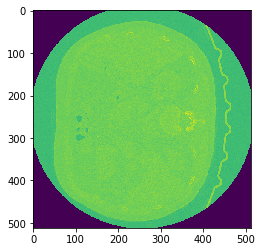

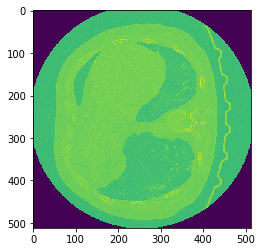

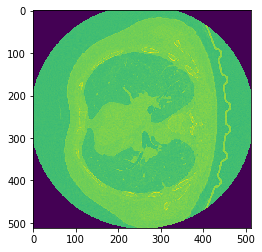

In [40]:
for i in range(3):
    index = i * 200
    plt.imshow(readdata[:,:,index])
    plt.show()

(512, 512, 1101)


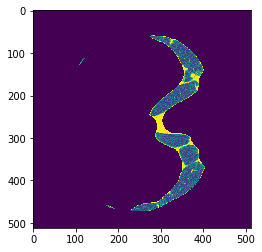

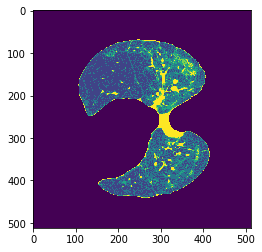

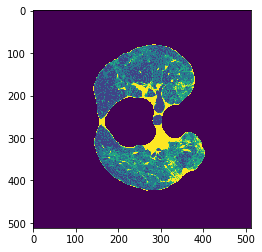

In [56]:
image_name_label = 'patient_1/GMM_LABELS.nrrd'
readdata, header = nrrd.read(image_name_label)
print(readdata.shape) 
# print(header)
for i in range(3):
    index = i * 200 + 300
    plt.imshow(readdata[:,:,index])
    plt.show()


In [45]:
np.unique(readdata) # using the GMM, each color represents a different label, 0 for empty space

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [51]:
readdata[150:200,300:350,800] # zoom in to a region that is colorful, every pixel is assigned a number(color)

array([[1, 1, 1, ..., 4, 4, 3],
       [2, 1, 1, ..., 4, 3, 2],
       [2, 2, 2, ..., 4, 2, 1],
       ...,
       [3, 3, 3, ..., 2, 1, 2],
       [3, 3, 2, ..., 1, 2, 2],
       [3, 2, 1, ..., 2, 2, 3]], dtype=uint8)

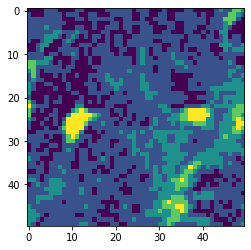

In [52]:
plt.imshow(readdata[150:200,300:350,800])

In [ ]:
# use GMM to assign each pixel a cluster label, GMM can find interesting clusters
# the original image is grey-scale

# when experts segment the image, they semgment based on what the ground glass opacity looks like (the pattern), labeling groups of pixels
# but the GMM is segmenting based on gray-scale level(intensity) of the pixels in original image -- gray-scale threshold based annotation